In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('household_power_consumption.txt',delimiter=';',low_memory=False)

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
print('Shape of Power Consumption Data:',df.shape)

Shape of Power Consumption Data: (2075259, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


# Exploratory Data Analysis

NULL VALUE

In [6]:
null_values = df.isna().sum()

check the null values by garph plot() function

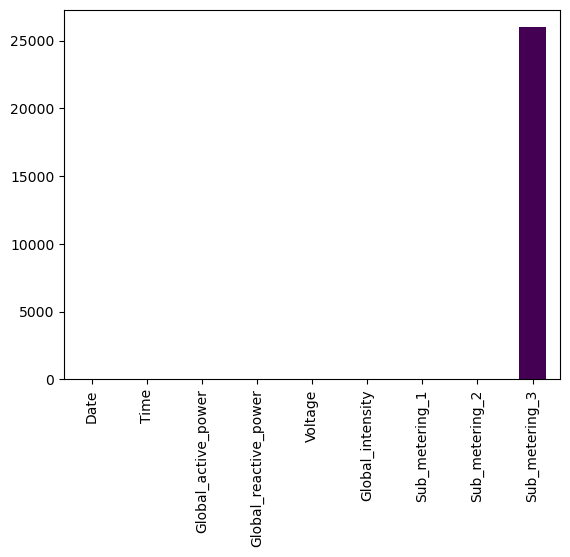

In [7]:
null_values.plot(kind='bar',cmap='viridis')
plt.show()

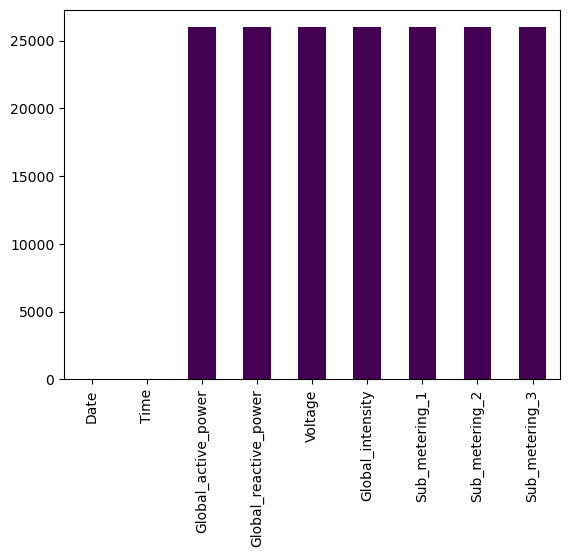

In [8]:
df.replace('?',pd.NA,inplace=True)
null_values = df.isna().sum()
null_values.plot(kind='bar',cmap='viridis')
plt.show()

In [9]:
df.dropna(inplace=True)
print('Shape of Power Consumption Data after removing null values:',df.shape)

Shape of Power Consumption Data after removing null values: (2049280, 9)


In [10]:
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [11]:
df['Global_active_power'] = df['Global_active_power'].astype('float')
df['Global_reactive_power'] = df['Global_reactive_power'].astype('float')
df['Voltage'] = df['Voltage'].astype('float')
df['Global_intensity'] = df['Global_intensity'].astype('float')
df['Sub_metering_1'] = df['Sub_metering_1'].astype('float')
df['Sub_metering_2'] = df['Sub_metering_2'].astype('float')
df['Sub_metering_3'] = df['Sub_metering_3'].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [13]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


# Boxplot of Columns

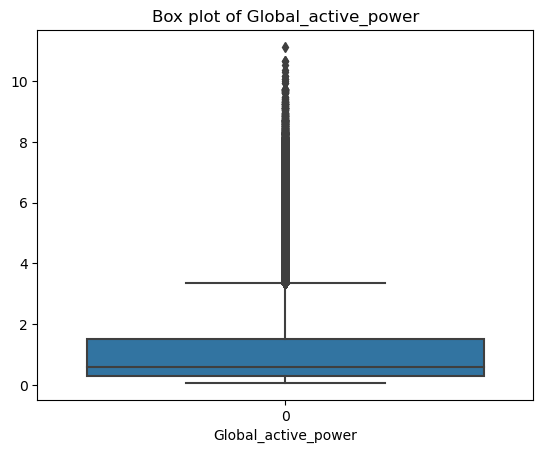

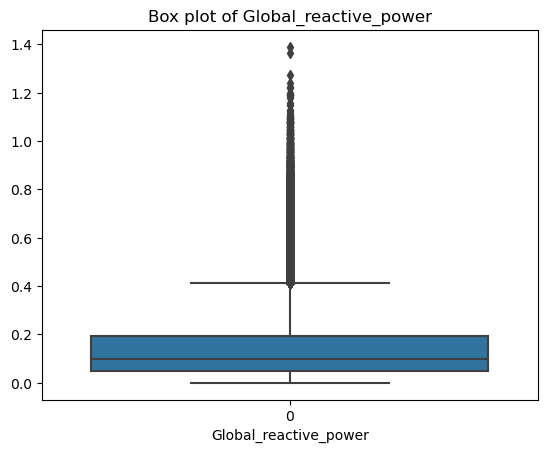

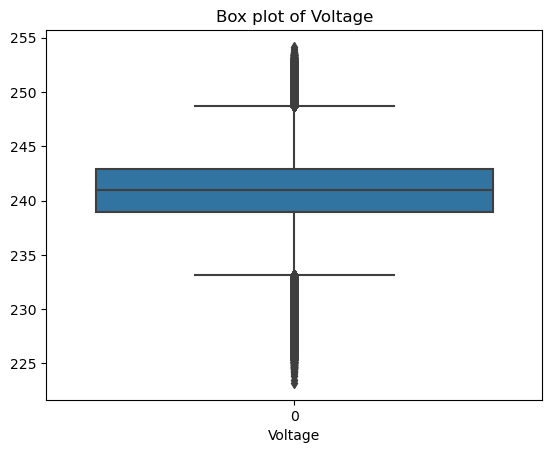

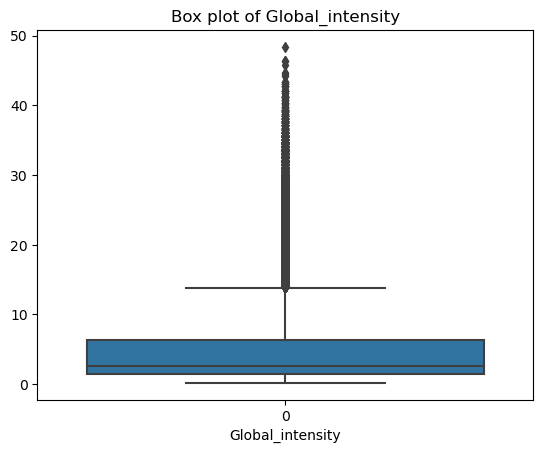

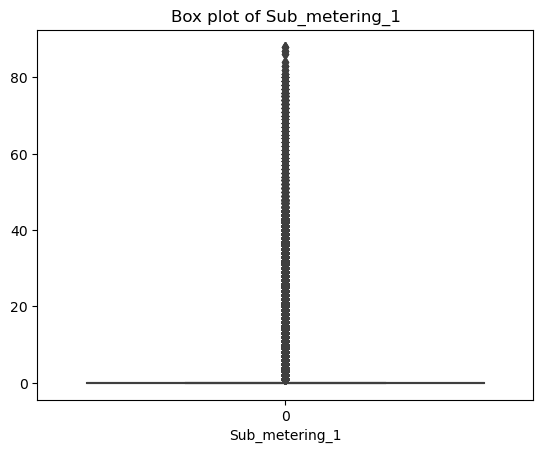

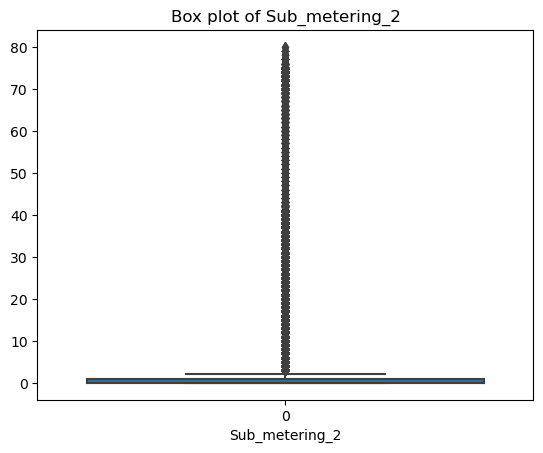

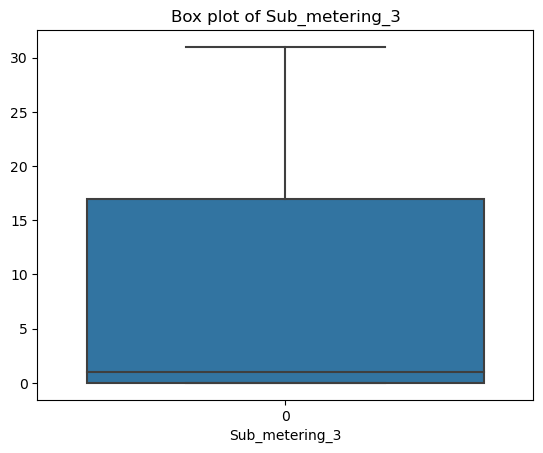

In [14]:
cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

for column in cols:
    sns.boxplot(df[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(f'{column}')
    plt.show()

# Preparing Summary DataFrame grouped by Date

In [15]:
active_power = df.groupby('Date')['Global_active_power'].sum()
voltage_avg = df.groupby('Date')['Voltage'].mean()
intensity = df.groupby('Date')['Global_intensity'].sum()
submeter_1 = df.groupby('Date')['Sub_metering_1'].sum()
submeter_2 = df.groupby('Date')['Sub_metering_2'].sum()
submeter_3 = df.groupby('Date')['Sub_metering_3'].sum()
total_energy = pd.merge(active_power,voltage_avg,on='Date',how='inner')
total_energy_2 = total_energy.merge(intensity,on='Date',how='inner')
total_energy_3 = total_energy_2.merge(submeter_1,on='Date',how='inner')
total_energy_4 = total_energy_3.merge(submeter_2,on='Date',how='inner')
energy = total_energy_4.merge(submeter_3,on='Date',how='inner')


In [16]:
energy.head()

,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,
1/1/2007,2749.004,240.128979,11400.4,0.0,352.0,5880.0
1/1/2008,2759.738,241.036674,11489.2,2461.0,2739.0,12355.0
1/1/2009,1406.692,242.836062,5975.8,765.0,3845.0,2803.0
1/1/2010,1224.252,242.565722,5093.4,2304.0,327.0,3558.0
1/10/2007,1720.922,239.239917,7306.2,1507.0,6622.0,5960.0


# Preprocessing

In [17]:
df_electric = energy.copy()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

attributes = list(df_electric.columns)
num_pipeline = make_pipeline(StandardScaler())
preprocessing = ColumnTransformer([
    ('num',num_pipeline,attributes)
])

# PCA AND KMEANS

Principal Component Analysis (PCA)

What: Dimensionality reduction technique How: Projects high-dimensional data onto a lower-dimensional space, retaining most of the information 

K-Means Clustering

What: Unsupervised clustering algorithm How: Groups similar data points into K clusters based on their features 

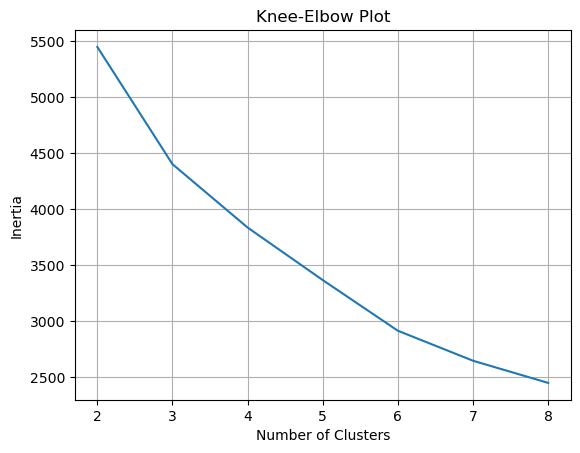

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = make_pipeline(preprocessing,PCA(n_components=.95))
inertias = []
n_clusters = [2,3,4,5,6,7,8]

for cluster in n_clusters:
    kmeans_electric = make_pipeline(pca,KMeans(n_clusters=cluster,n_init='auto',random_state=42))
    kmeans_electric.fit(df_electric)
    inertias.append(kmeans_electric['kmeans'].inertia_)
plt.plot(n_clusters,inertias)
plt.title('Knee-Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [20]:
kmeans_e3 = make_pipeline(pca,KMeans(n_clusters=3,n_init='auto',random_state=42))
kmeans_e3.fit(df_electric)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['Global_active_power',
                                                                    'Voltage',
                                                                    'Global_intensity',
                                                                    'Sub_metering_1',
                                                                    'Sub_metering_2',
                                                                    'Sub_metering_3'])])),
                                 ('pca', PCA(n_components=0.95))])),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [21]:
energy['cluster'] = kmeans_e3['kmeans'].labels_

# Cluster Analysis

Global Active Power

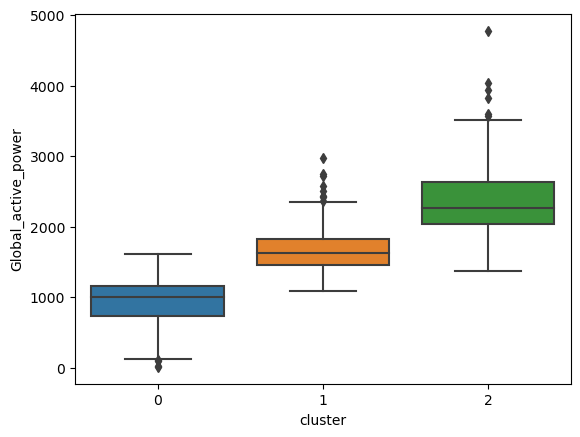

In [22]:
sns.boxplot(data=energy,x='cluster',y='Global_active_power')
plt.show()

Voltage

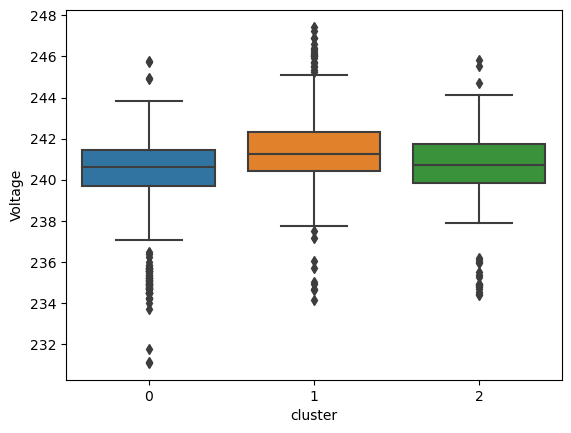

In [23]:
sns.boxplot(data=energy,x='cluster',y='Voltage')
plt.show()

Global Intensity

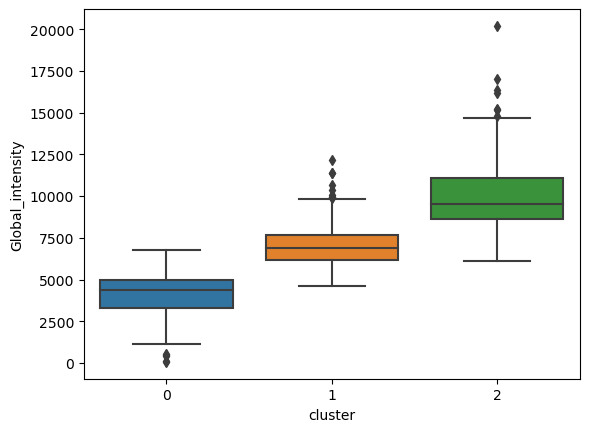

In [24]:
sns.boxplot(data=energy,x='cluster',y='Global_intensity')
plt.show()

Sub-metering-1 , Sub-metering-2, Sub-metering-3

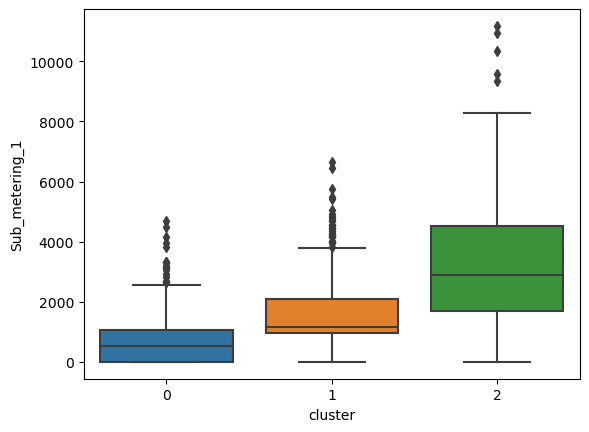

In [25]:
sns.boxplot(data=energy,x='cluster',y='Sub_metering_1')
plt.show()

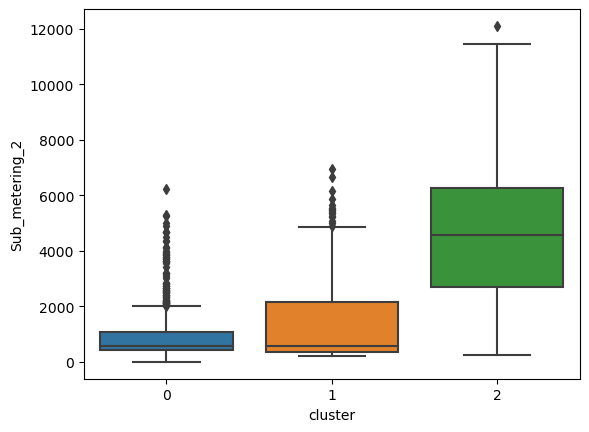

In [26]:
sns.boxplot(data=energy,x='cluster',y='Sub_metering_2')
plt.show()

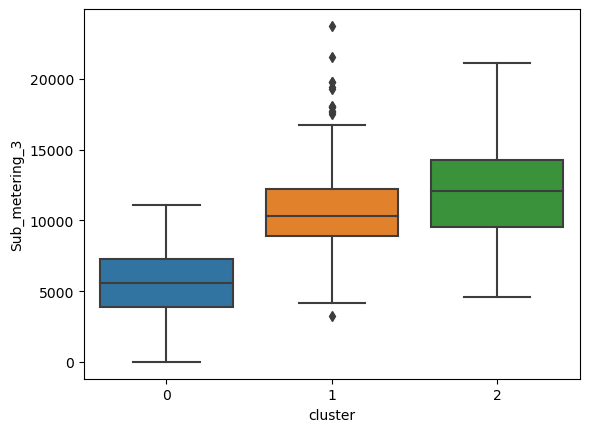

In [27]:
sns.boxplot(data=energy,x='cluster',y='Sub_metering_3')
plt.show()

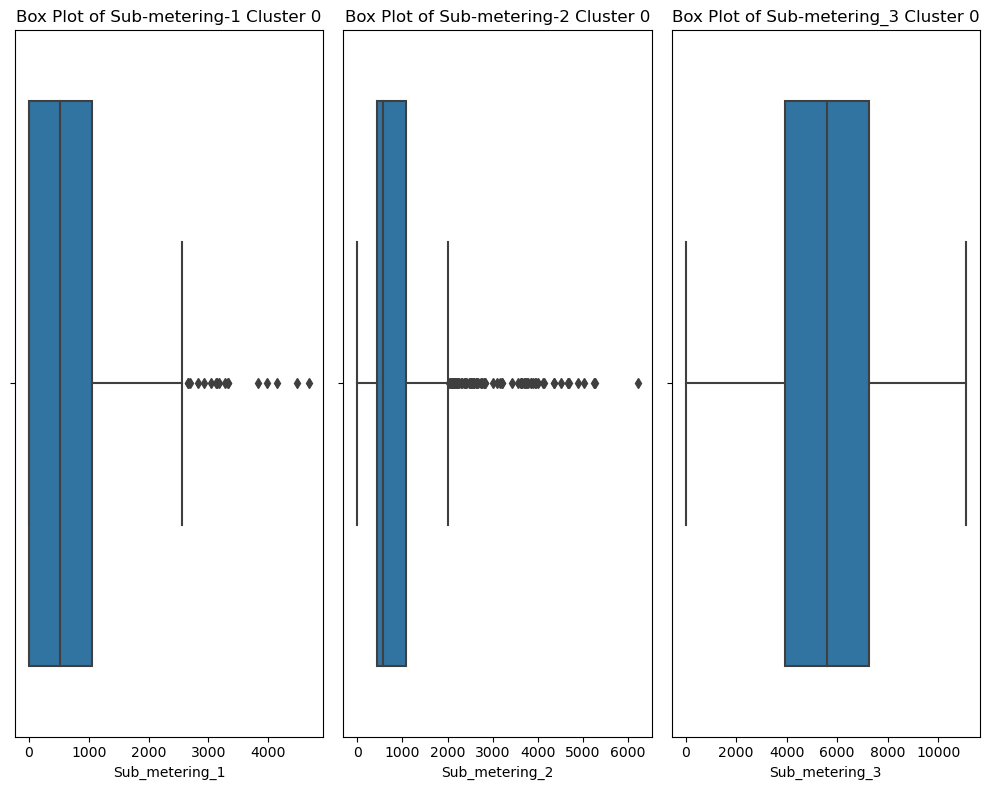

In [28]:
cluster_0 = energy[energy.cluster == 0]
cluster_1 = energy[energy.cluster == 1]
cluster_2 = energy[energy.cluster == 2]
fig,axes = plt.subplots(1,3,figsize=(10,8))
sns.boxplot(data=cluster_0,x='Sub_metering_1',ax=axes[0])
axes[0].set_title('Box Plot of Sub-metering-1 Cluster 0')
sns.boxplot(data=cluster_0,x='Sub_metering_2',ax=axes[1])
axes[1].set_title('Box Plot of Sub-metering-2 Cluster 0')
sns.boxplot(data=cluster_0,x='Sub_metering_3',ax=axes[2])
axes[2].set_title('Box Plot of Sub-metering_3 Cluster 0')
plt.tight_layout()
plt.show()

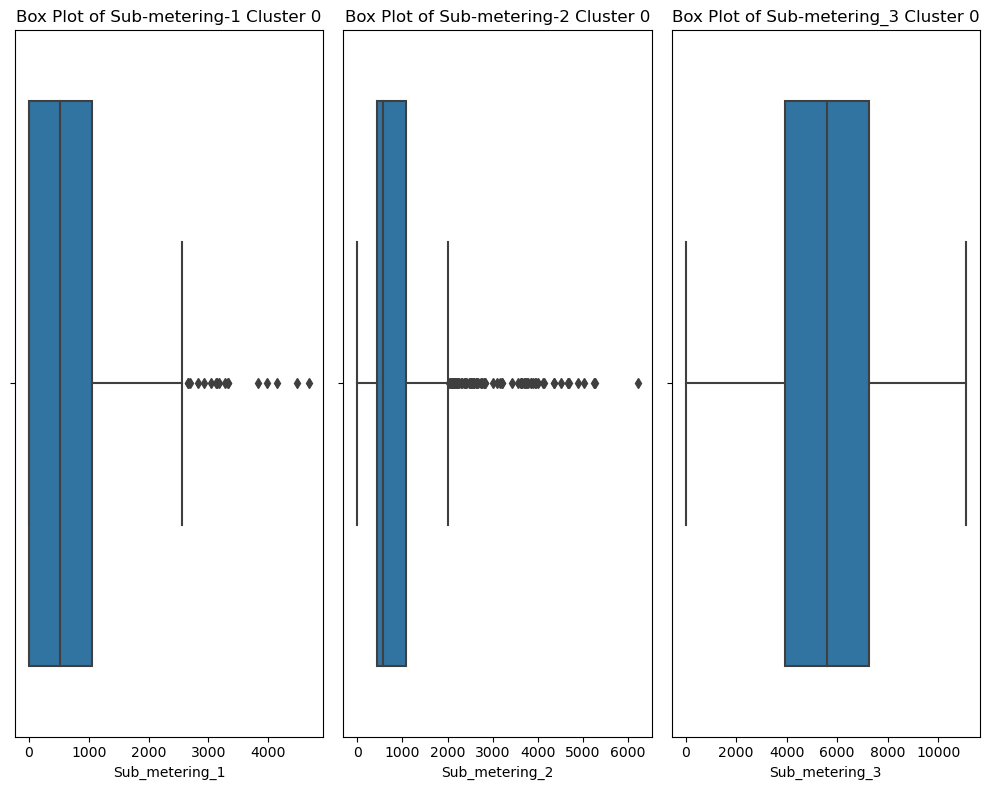

In [29]:
cluster_0 = energy[energy.cluster == 0]
cluster_1 = energy[energy.cluster == 1]
cluster_2 = energy[energy.cluster == 2]
fig,axes = plt.subplots(1,3,figsize=(10,8))
sns.boxplot(data=cluster_0,x='Sub_metering_1',ax=axes[0])
axes[0].set_title('Box Plot of Sub-metering-1 Cluster 0')
sns.boxplot(data=cluster_0,x='Sub_metering_2',ax=axes[1])
axes[1].set_title('Box Plot of Sub-metering-2 Cluster 0')
sns.boxplot(data=cluster_0,x='Sub_metering_3',ax=axes[2])
axes[2].set_title('Box Plot of Sub-metering_3 Cluster 0')
plt.tight_layout()
plt.show()

In [30]:
energy_transformed = kmeans_e3.transform(df_electric)
energy_transformed.shape

(1433, 3)

In [31]:
df_transformed = pd.DataFrame(energy_transformed,columns=['transformed_1','transformed_2','transformed_3'])
df_transformed.head()

,transformed_1,transformed_2,transformed_3
0,3.155978,1.170026,2.022314
1,4.738827,2.597343,1.065479
2,2.204873,2.515367,3.802114
3,1.733480,2.252983,4.209228
4,3.300180,3.028291,2.731108


In [32]:
df_transformed['cluster'] = kmeans_e3['kmeans'].labels_

# Transformed Data Analysis

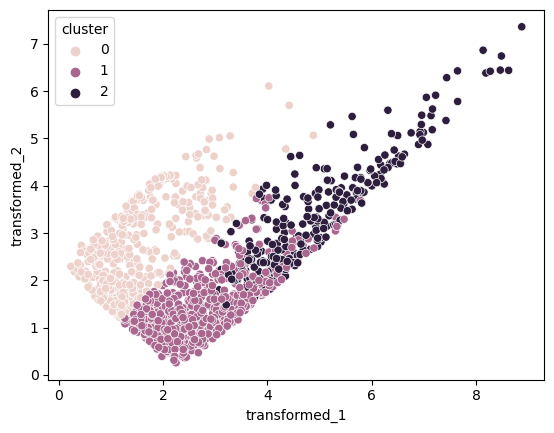

In [33]:
sns.scatterplot(data=df_transformed,x='transformed_1',y='transformed_2',hue='cluster')
plt.show()

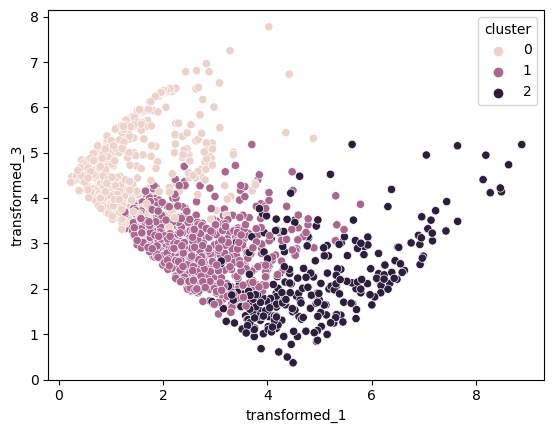

In [34]:
sns.scatterplot(data=df_transformed,x='transformed_1',y='transformed_3',hue='cluster')
plt.show()


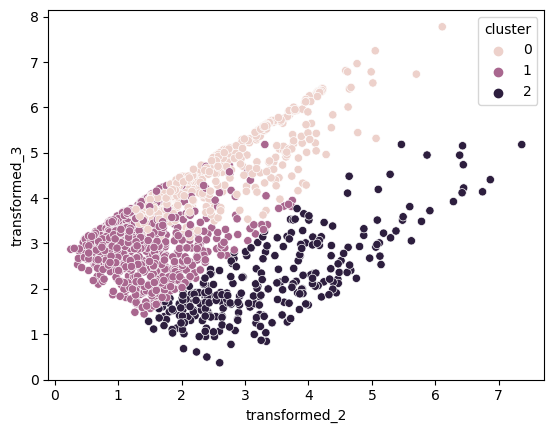

In [35]:
sns.scatterplot(data=df_transformed,x='transformed_2',y='transformed_3',hue='cluster')
plt.show()